In [6]:
import os
import sys

sys.path.insert(1, os.getcwd().replace('\\Assignment_1', ''))

import math
import mylibrary
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import legendre
from scipy.optimize import fsolve

# Question 1

In [2]:
def fixed_point_exp(initial_guess, tolerance=1e-4, max_iterations=100):
    x_n = initial_guess
    print('S No.', 'Current value')
    num = 0
    for i in range(max_iterations):
        print(str(num) + '     ' + str(x_n))
        x_next = math.exp(-x_n)
        if abs(x_next - x_n) < tolerance:
            return x_next
        x_n = x_next
        num+=1
    return None  # If the method does not converge within the maximum iterations

# Make an initial guess
x_0 = 1

# Solve the equation using the fixed point method for the function
solution = fixed_point_exp(x_0)

# Display the result
if solution is not None:
    print(f"The solution, accurate to 4 decimal places, is: {solution:.4f}")
else:
    print("The method did not converge within the specified number of iterations")

S No. Current value
0     1
1     0.36787944117144233
2     0.6922006275553464
3     0.5004735005636368
4     0.6062435350855974
5     0.545395785975027
6     0.5796123355033789
7     0.5601154613610891
8     0.571143115080177
9     0.5648793473910495
10     0.5684287250290607
11     0.5664147331468833
12     0.5675566373282834
13     0.5669089119214953
14     0.5672762321755696
15     0.5670678983907884
16     0.567186050099357
The solution, accurate to 4 decimal places, is: 0.5671


# Question 2

In [3]:
def func1(x):
    func_val = math.sqrt(1+x**4)
    return func_val

In [5]:
def simpson_tolerance(a, b, func, tolerance=1e-3, max_iterations=100):
    print('Number of subdivisions', '  ', 'Current value of integral')
    for i in range(1, max_iterations):
        I = mylibrary.Simpson(a,b,func,2*i)

        print(str(2*i) + '                         ' + str(I))
        I_next = mylibrary.Simpson(a,b,func,2*(i+1))

        if abs(I_next - I) < tolerance:
            print(str(2*(i+1)) + '                         ' + str(I_next))
            return I_next 
        I = I_next
    return None

# Set intervals, initial number of steps, and tolerance
a = 0
b = 1
N_initial = 2
tolerance = 1e-7

# Solve the equation using the fixed point method for the function
solution = simpson_tolerance(a, b, func1, tolerance)
#solution

# Display the result
if solution is not None:
    print(f"The solution, accurate to 6 decimal places, is: {solution:.6f}")
else:
    print("The method did not converge within the specified number of iterations")

Number of subdivisions    Current value of integral
2                         1.0895531979984592
4                         1.089413433193644
6                         1.0894287579268167
8                         1.0894292989850167
10                         1.0894293839024571
The solution, accurate to 6 decimal places, is: 1.089429


In [14]:
def gauss_quadrature(a, b, func, N):
    norm_I = 0
    std_factor = (b-a)/2

    P = legendre(N)
    nodes = np.sort(np.array(fsolve(P, np.linspace(-1, 1, N))))
    weights = 2 / ((1 - nodes**2) * P(nodes)**2)

    for i in range(N):
        norm_I += weights[i]*func(nodes[i])

    return std_factor*norm_I

print(gauss_quadrature(0, 1, func1, 4))

7.66289303539591e+32


In [ ]:
def gauss_quadrature(func, a, b, n):                              # Code for Gauss-Legendre Quadrature based definite integration
    dxdt = (b - a)/2                                                    # defining interval scaling from [-1,1] to [a,b]

    guess_list = np.linspace(-1, 1, n)                                     # generating n partitions of interval [-1,1]
    root_list = [mylibrary.newtonraphson(func, x, 1e-6) for x in guess_list]           # finding roots of Legendre polynomial by providing the equal partitions of [-1,1] to be guess values 
    weight_list = [2/((1 - x**2) * (dfdx_sym(P, n, x))**2) for x in root_list]
                                                                        # obtaining weight functions for each root of the Legendre polynmial
    t_list = ((b - a)/2)*(array(root_list)) + (a + b)/2                 # scaling the interval [-1,1] to [a,b]
    sum = 0
    for i in range(len(weight_list)):
        sum += f(t_list[i]) * weight_list[i]                            # performing sum over w(t_i) * f(t_i) where t_i is in [a,b]

    return sum * dxdt

# Question 3

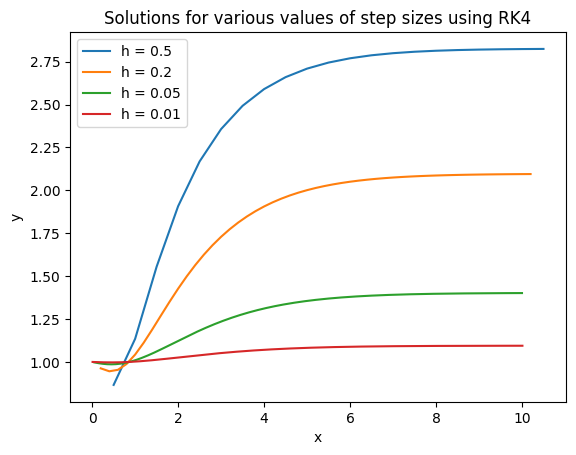

In [18]:
def func2(x, y):
    func_val = (5*x**2-y)/math.exp(x+y)
    return func_val

h_1 = 0.5
h_2 = 0.2
h_3 = 0.05
h_4 = 0.01

x_i = 0
x_f = 10
y_0 = 1

X_1, Y_1 = mylibrary.RK4(h_1, x_i, x_f, y_0, func2)
X_2, Y_2 = mylibrary.RK4(h_2, x_i, x_f, y_0, func2)
X_3, Y_3 = mylibrary.RK4(h_3, x_i, x_f, y_0, func2)
X_4, Y_4 = mylibrary.RK4(h_4, x_i, x_f, y_0, func2)

plt.plot(X_1, Y_1, label='h = ' + str(h_1))
plt.plot(X_2, Y_2, label='h = ' + str(h_2))
plt.plot(X_3, Y_3, label='h = ' + str(h_3))
plt.plot(X_4, Y_4, label='h = ' + str(h_4))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solutions for various values of step sizes using RK4')
plt.legend()
plt.show()

# Question 4

TypeError: Input z must be 2D, not 1D

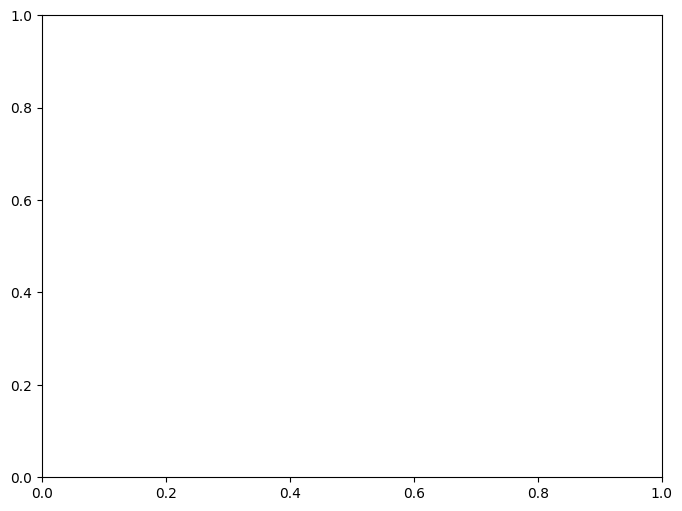

In [4]:
def crank_nicolson_solve(nx, nt, L, T, alpha):
    # Parameters
    dx = L / (nx - 1)
    dt = T / nt

    # Grid
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)

    # Initial conditions
    u = np.sin(np.pi * x)  # Example initial condition (sinusoidal wave)

    # Coefficients
    r = alpha * dt / (2 * dx**2)
    A = np.eye(nx) * (1 + 2 * r)
    B = np.eye(nx, k=-1) * -r
    C = np.eye(nx, k=1) * -r

    # Time-stepping loop (Crank-Nicolson method)
    for i in range(1, nt):
        u_n = u.copy()
        b = np.dot((np.eye(nx) - A), u_n) + 0.5 * dt * np.dot(B + C, u_n)
        u = np.linalg.solve(A, b)

    return x, t, u

# Example usage
nx = 100  # Number of spatial grid points
nt = 500  # Number of time steps
L = 1.0   # Length of the rod
T = 0.1   # Total simulation time
alpha = 0.01  # Thermal diffusivity

x, t, solution = crank_nicolson_solve(nx, nt, L, T, alpha)

# Plot the result as a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(t, x, solution, cmap='viridis', levels=50)
plt.colorbar(contour, label='Temperature')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Crank-Nicolson Solution of 1D Heat Equation - Contour Plot')
plt.show()

# Question 5

C:\Users\Ratul\AppData\Local\Temp\ipykernel_19496\3271177394.py:27: RuntimeWarning: overflow encountered in scalar divide
  uyy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
C:\Users\Ratul\AppData\Local\Temp\ipykernel_19496\3271177394.py:26: RuntimeWarning: overflow encountered in scalar divide
  uxx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
C:\Users\Ratul\AppData\Local\Temp\ipykernel_19496\3271177394.py:26: RuntimeWarning: invalid value encountered in scalar add
  uxx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
C:\Users\Ratul\AppData\Local\Temp\ipykernel_19496\3271177394.py:27: RuntimeWarning: invalid value encountered in scalar add
  uyy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
C:\Users\Ratul\AppData\Local\Temp\ipykernel_19496\3271177394.py:26: RuntimeWarning: invalid value encountered in scalar subtract
  uxx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
C:\Users\Ratul\AppData\Local\Temp\ipykernel_19496\3271177394.py:27: RuntimeWarning: inval

Solution Table:
[[0.     0.     0.     0.     0.     0.    ]
 [0.4       nan    nan    nan    nan 1.0873]
 [0.8       nan    nan    nan    nan 2.1746]
 [1.2       nan    nan    nan    nan 3.2619]
 [1.6       nan    nan    nan    nan 4.3493]
 [2.     2.4428 2.9836 3.6442 4.4511 5.4366]]


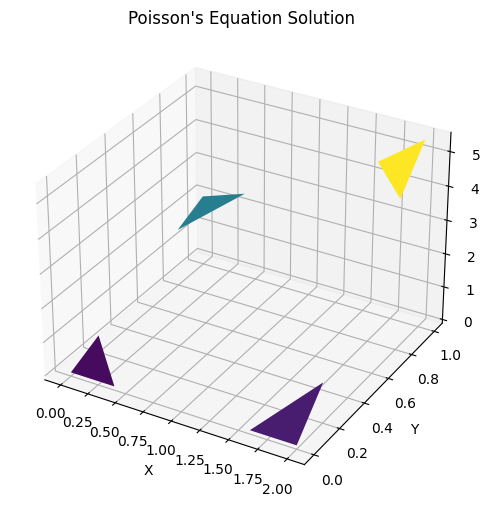

In [6]:
def poisson_equation_solver(nx, ny, Lx, Ly):
    dx = Lx / (nx - 1)
    dy = Ly / (ny - 1)

    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)

    # Initialize the solution matrix
    u = np.zeros((nx, ny))

    # Set boundary conditions
    u[0, :] = 0  # u(0, y) = 0
    u[-1, :] = 2 * np.exp(y)  # u(2, y) = 2e^y
    u[:, 0] = x  # u(x, 0) = x
    u[:, -1] = x * np.exp(1)  # u(x, 1) = xe

    # Iterative solution using finite differences
    max_iter = 1000
    tolerance = 1e-5

    for _ in range(max_iter):
        u_old = u.copy()

        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                uxx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
                uyy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
                u[i, j] = 0.5 * (uxx + uyy - x[i] * np.exp(y[j]))

        # Check for convergence
        if np.linalg.norm(u - u_old) < tolerance:
            break

    return x, y, u

# Define the grid parameters
nx = 6
ny = 6
Lx = 2
Ly = 1

# Solve Poisson's equation
x, y, solution = poisson_equation_solver(nx, ny, Lx, Ly)

# Display the solution in a table
print("Solution Table:")
print(np.round(solution, 4))

# Display the solution in a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, solution, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Solution')
ax.set_title('Poisson\'s Equation Solution')

plt.show()